![](health_ins_pic.jpeg)

# **Part One: Data Exploration**

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

*    Read in the dataset, and display some summaries of the data.

*    Fix any concerns you have about the data.

*    Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [ ]:
# Reading in the data
import pandas as pd

ins_costs = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
ins_costs.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [ ]:
# Checking the number of rows and columns
ins_costs.shape

(431, 6)

In [ ]:
# Displaying summary statistics
ins_costs.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [ ]:
# Checking for NA
ins_costs.isna().sum()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

*Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.*

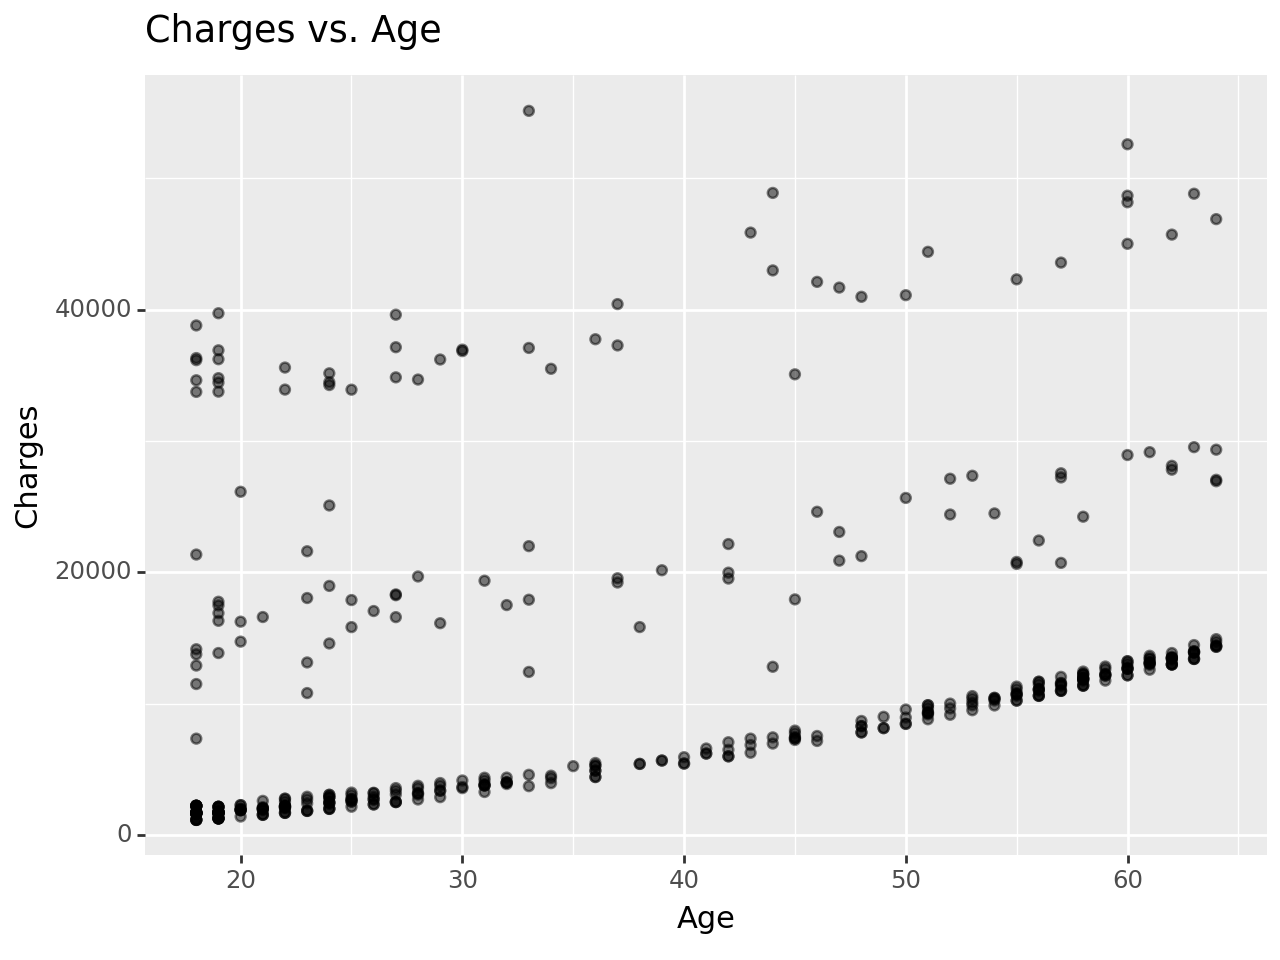

In [ ]:
# Plot 1: Scatterplot of charges vs age
from plotnine import ggplot, aes, geom_point, labs, geom_boxplot

plot = (
    ggplot(ins_costs, aes(x='age', y='charges')) +
    geom_point(alpha=0.5) +
    labs(title="Charges vs. Age", x="Age", y="Charges")
)

print(plot)

*    Insurance charges tend to increase as people age, but there are instances of higher charges at younger ages as well, possibly having to do with smoking or having a high BMI.

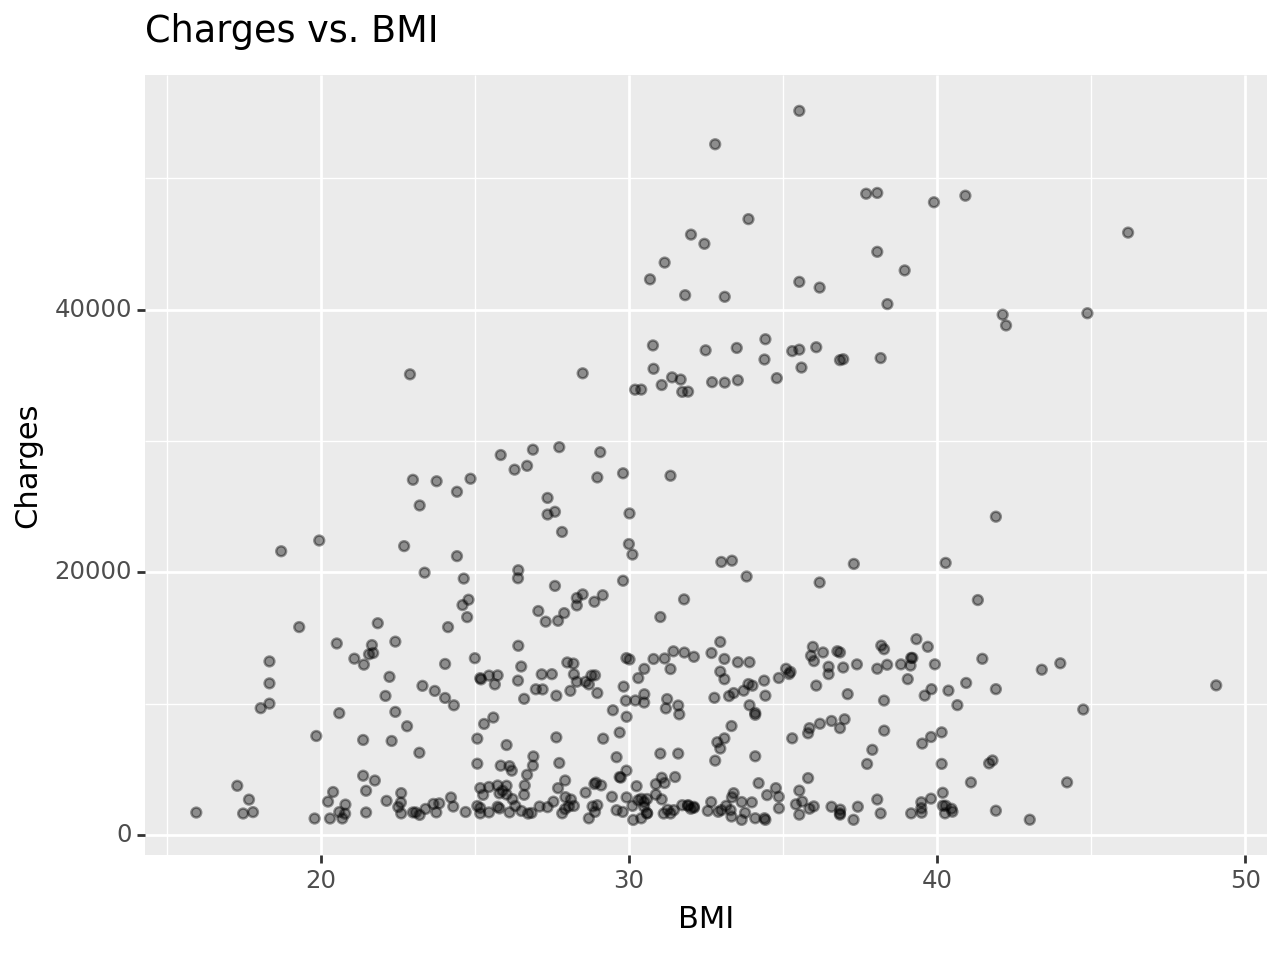

In [ ]:
# Plot2: Scatterplot of charges vs BMI
plot = (
    ggplot(ins_costs, aes(x='bmi', y='charges')) +
    geom_point(alpha=0.4) +
    labs(title="Charges vs. BMI", x="BMI", y="Charges")
)

print(plot)

*    The plot shows that there are not many healthy BMI data points between 18.5 and 24.9 as there are overweight and obese levels of BMI. There seems to be a positive correlation between BMI and insurance charges, especially when BMI is 30+ which indicates obese body weight.

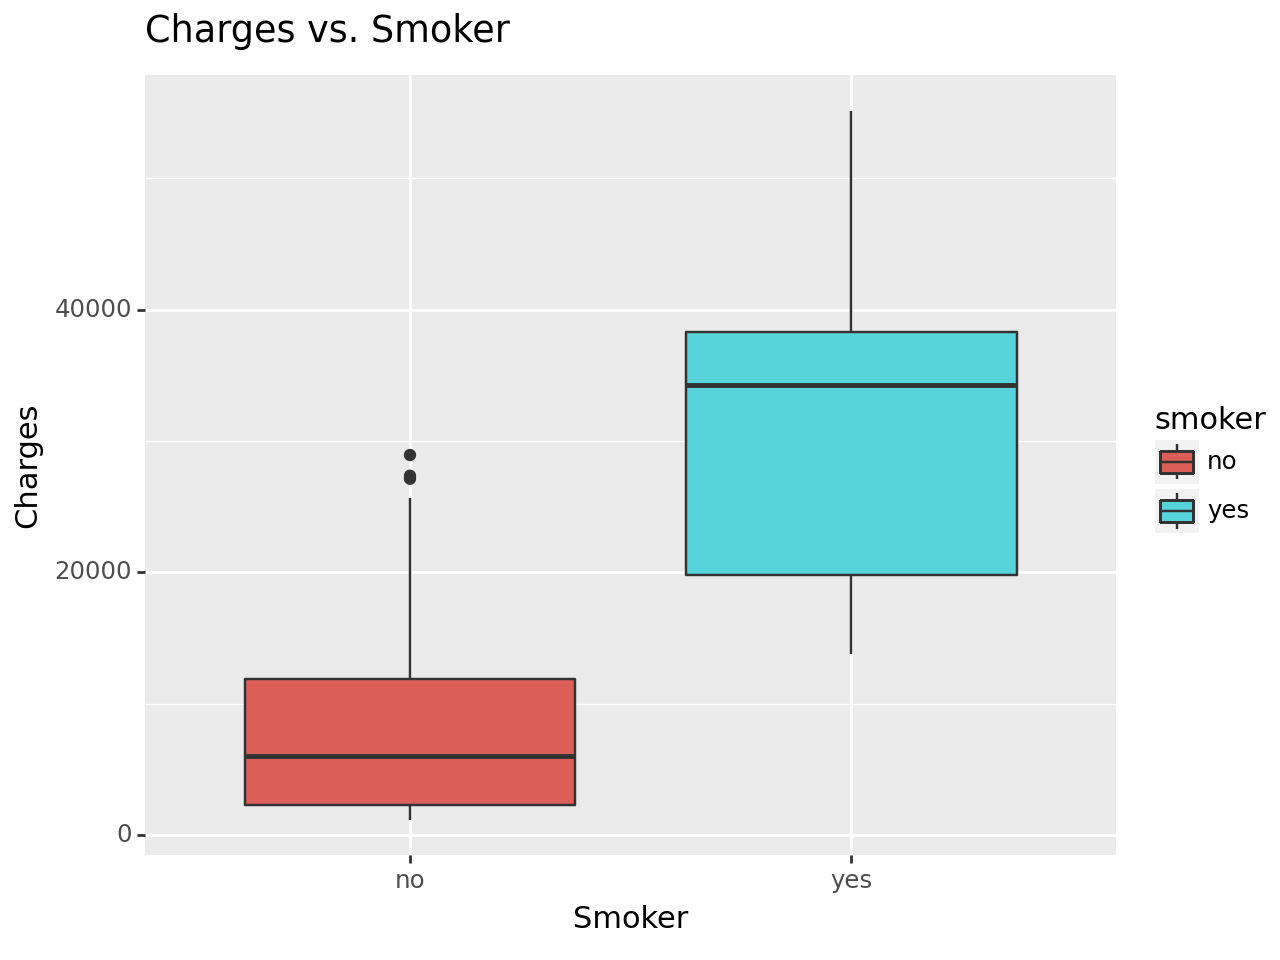

In [ ]:
# Plot3: Boxplot of charges vs smoker
plot = (
    ggplot(ins_costs, aes(x='smoker', y='charges')) +
    geom_boxplot(aes(fill='smoker')) +
    labs(title="Charges vs. Smoker", x="Smoker", y="Charges")
)

print(plot)

*    Insurance charges are significantly higher for smokers than they are for non-smokers as presented by this boxplot.

# **Part Two: Simple Linear Models**

*1. Construct a simple linear model to predict the insurance charges from the beneficiary's age. Discuss the model fit, and interpret the coefficient estimates.*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining the response and predictor variables
X1 = ins_costs[['age']]
y = ins_costs['charges']

lr1 = LinearRegression()

# Fitting the model
lr1.fit(X1, y)

# Predicting the charges
y_pred1 = lr1.predict(X1)

# Calculating R2 for Model 1
r2_1 = r2_score(y, y_pred1)

In [ ]:
print(f"R2: {r2_1:.2f}")
print(f"y-int: {lr1.intercept_:.2f}")
print(f"Coeff [age]: {lr1.coef_[0]:.2f}")

R2: 0.10
y-int: 3611.76
Coeff [age]: 228.80


*    The R-squared score of 0.10 indicates that only 10% of the variability is explained by the model. This would suggest that only using age as a predictor variable is not enough to estimate a reliable model.

*    The y-intercept value indicates that at age 0, there would be an estimated insurance charge of $3,611.76.

*    The coefficient for the age variable indicates that with every 1 unit of change in age, there is a $228.80 change in insurance costs, holding all else constant.

*2. Make a model that also incorporates the variable sex. Report your results.*



In [ ]:
# Creating dummy variables and creating a reference variable for each
ins_costs_dummies = pd.get_dummies(ins_costs, drop_first=True)
ins_costs_dummies.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,33,22.705,21984.47061,1,0,1,0,0
2,32,28.880,3866.85520,1,0,1,0,0
3,31,25.740,3756.62160,0,0,0,1,0
4,60,25.840,28923.13692,0,0,1,0,0


In [ ]:
# Defining the response and predictor variables
X2 = ins_costs_dummies[['age', 'sex_male']]
y = ins_costs_dummies['charges']

lr2 = LinearRegression()

# Fitting the model
lr2.fit(X2, y)

# Predicting the charges
y_pred2 = lr2.predict(X2)

# Calculating R2 for Model 2
r2_2 = r2_score(y, y_pred2)

In [ ]:
print(f"R2: {r2_2:.2f}")
print(f"y-int: {lr2.intercept_:.2f}")
print(f"Coeff [age]: {lr2.coef_[0]:.2f}")
print(f"Coeff [sex_male]: {lr2.coef_[1]:.2f}")

R2: 0.10
y-int: 3315.33
Coeff [age]: 228.43
Coeff [sex_male]: 649.83


*     This model that incorporates the age and sex variable has an r-squared value of 0.10, which indicates that only 10% of the variability is explained by the model. This could mean that incorporating other variables such as bmi, smoker, and region could better fit the model than just age and sex alone.

*     The y-intercept value indicates that at age 0, there is an estimated charge of $3315.33.

*    The coefficient for age is 228.43, which indicates that with 1 unit change in age, holding all else constant, there would be a $228.43 change in insurance charges.

*     The coefficient for sex is 649.83, which would indicate that being male is associated with an increase in insurance charges by $649.83, holding all else constant.


*3. Now make a model that does not include sex, but does include smoker. Report your results.*

In [ ]:
# Defining the response and predictor variables
X3 = ins_costs_dummies[['age', 'smoker_yes']]
y = ins_costs_dummies['charges']

lr3 = LinearRegression()

# Fitting the model
lr3.fit(X3, y)

# Predicting the charges
y_pred3 = lr3.predict(X3)

# Calculating R2 for Model 3
r2_3 = r2_score(y, y_pred3)

In [ ]:
print(f"R2: {r2_3:.2f}")
print(f"y-int: {lr3.intercept_:.2f}")
print(f"Coeff [Age]: {lr3.coef_[0]:.2f}")
print(f"Coeff [Smoker_Yes]: {lr3.coef_[1]:.2f}")

R2: 0.76
y-int: -2166.85
Coeff [Age]: 253.15
Coeff [Smoker_Yes]: 24048.87


*   This model with age and smoker predicting charges had an R2 score of 0.76, which indicates that 76% of the variability is represented by the model. This is considerably more than the previous models, so we can determine that smoking along with age has a considerable effect on insurance charges, more so than age and sex.

*    The y-intercept is -2166.85 which indicates that at age 0 and non-smoking, there is a charge of -$2166.85, but like previous models, the y-intercept does not have meaning as someone with age 0 would not typically have hospital charges.

*    The coefficient for age is 253.15 which indicates that for every 1 unit change in age, holding all other variables constant, there is a $253.15 change in insurance charges.

*    The coefficient for being a smoker is 24048.87 and this indicates that being a smoker results in a increase in insurance charge by $24048.87.

*4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.*

In [ ]:
# Calculating MSE and RMSE for model 1
mse_1 = mean_squared_error(y, y_pred1)
rmse_1 = np.sqrt(mse_1)

print(f"R2 for Model 1: {r2_1:.2f}")
print(f"Mean Squared Error for Model 1: {mse_1:.2f}")
print(f"Root Mean Squared Error for Model 1: {rmse_1:.2f}")

R2 for Model 1: 0.10
Mean Squared Error for Model 1: 126739267.91
Root Mean Squared Error for Model 1: 11257.85


In [ ]:
# Calculating MSE and RMSE for model 2
mse_2 = mean_squared_error(y, y_pred2)
rmse_2 = np.sqrt(mse_2)

print(f"R2 for Model 2: {r2_2:.2f}")
print(f"Mean Squared Error for Model 2: {mse_2:.2f}")
print(f"Root Mean Squared Error for Model 2: {rmse_2:.2f}")

R2 for Model 2: 0.10
Mean Squared Error for Model 2: 126633939.68
Root Mean Squared Error for Model 2: 11253.17


In [ ]:
# Calculating MSE and RMSE for model 3
mse_3 = mean_squared_error(y, y_pred3)
rmse_3 = np.sqrt(mse_3)

print(f"R2 for Model 3: {r2_3:.2f}")
print(f"Mean Squared Error for Model 3: {mse_3:.2f}")
print(f"Root Mean Squared Error for Model 3: {rmse_3:.2f}")

R2 for Model 3: 0.76
Mean Squared Error for Model 3: 33719831.47
Root Mean Squared Error for Model 3: 5806.88


*    Between Model 3 and Model 2, Model 3's R-squared score is considerably higher than Model 2 and also Model 1. When comparing Model 1 to Model 2, one variable was added, and we can see that just from adding sex, the model did not have any improvements, while having a very slightly lower MSE.

*    Between Model 2 and Model 3, removing the sex variable and adding in the smoker variable improved the R2 score dramatically, while the MSE was also considerably lower.

*    Model 3 fits the data better than the Model 1 or Model 2.

# **Part Three: Multiple Linear Models**

Now let’s consider including multiple quantitative predictors.



*1. Fit a model that uses age and bmi as predictors.* \(Do not include an interaction term, age\*bmi, between these two.) *Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?*

In [ ]:
# Defining the response and predictor variables
X4 = ins_costs[['age', 'bmi']]
y = ins_costs['charges']

lr4 = LinearRegression()

# Fitting the model
lr4.fit(X4, y)

# Predicting the charges
y_pred4 = lr4.predict(X4)

# Calculating R2 for Model 1
r2_4 = r2_score(y, y_pred4)

In [ ]:
# Calculating MSE and RMSE for model 4
mse_4 = mean_squared_error(y, y_pred4)
rmse_4 = np.sqrt(mse_4)

print(f"R2 for Model 4: {r2_4:.2f}")
print(f"Mean Squared Error for Model 4: {mse_4:.2f}")
print(f"Root Mean Squared Error for Model 4: {rmse_4:.2f}")

R2 for Model 4: 0.12
Mean Squared Error for Model 4: 123792439.58
Root Mean Squared Error for Model 4: 11126.21


*    Model 4 with predictor variables age and bmi, without an interaction term between them, had a MSE of 123,792,439.58, which was a little better at explaining the variability in the model than Model 1 at 126,739,267.91 from Part Two Q1. The R2 score tells the same story; Model 4, 0.12, was only a little better than Model 1, 0.10.

*2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?*

In [ ]:
# Defining the response and predictor variables
X5 = ins_costs.assign(age_squared = lambda x: x['age'] ** 2)[['age', 'age_squared']]
y = ins_costs['charges']

lr5 = LinearRegression()

# Fitting the model
lr5.fit(X5, y)

# Predicting the charges
y_pred5 = lr5.predict(X5)

# Calculating R2 for Model 5
r2_5 = r2_score(y, y_pred5)

In [ ]:
# Calculating MSE and RMSE for model 5
mse_5 = mean_squared_error(y, y_pred5)
rmse_5 = np.sqrt(mse_5)

print(f"R2 for Model 5: {r2_5:.2f}")
print(f"Mean Squared Error for Model 5: {mse_5:.2f}")
print(f"Root Mean Squared Error for Model 5: {rmse_5:.2f}")

R2 for Model 5: 0.10
Mean Squared Error for Model 5: 126710293.81
Root Mean Squared Error for Model 5: 11256.57


*    Model 5 with predictor variables age and age^2 had a MSE of 126,710,293.81, which was only slightly better at explaining the variability than Model 1 at 126,739,267.91, but slightly worse than Model 4 at 123,792,439.58. The R2 score tells the same story; Model 5's R2 of 0.10 was approximately the same as Model 1's R2 of 0.10 from Part Two Q1.

*3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Defining the response and predictor variables
poly_degrees_4 = PolynomialFeatures(degree=(1,4), include_bias=False)
X6 = poly_degrees_4.fit_transform(ins_costs[['age']])
y = ins_costs['charges']

lr6 = LinearRegression()

# Fitting the model
lr6.fit(X6, y)

# Predicting the charges
y_pred6 = lr6.predict(X6)

# Calculating R2 for Model 6
r2_6 = r2_score(y, y_pred6)

In [ ]:
# Calculating MSE and RMSE for model 6
mse_6 = mean_squared_error(y, y_pred6)
rmse_6 = np.sqrt(mse_6)

print(f"R2 for Model 6: {r2_6:.2f}")
print(f"Mean Squared Error for Model 6: {mse_6:.2f}")
print(f"Root Mean Squared Error for Model 6: {rmse_6:.2f}")

R2 for Model 6: 0.11
Mean Squared Error for Model 6: 125550389.65
Root Mean Squared Error for Model 6: 11204.93


*    Model 6 with predictor variables age, age^2, age^3, and age^4 had a MSE of 125,550,389.65, and R2 score of 0.11, which was slightly better at explaining the variability than P2 Q1's Model 1 at MSE of 126,739,267.91 and R2 of 0.10. It has the lowest MSE and highest R2 so far of all the models.

*4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?*

In [ ]:
# Defining the response and predictor variables
poly_degrees_12 = PolynomialFeatures(degree=(1,12), include_bias=False)
X7 = poly_degrees_12.fit_transform(ins_costs[['age']])
y = ins_costs['charges']

lr7 = LinearRegression()

# Fitting the model
lr7.fit(X7, y)

# Predicting the charges
y_pred7 = lr7.predict(X7)

# Calculating R2 for Model 6
r2_7 = r2_score(y, y_pred7)

In [ ]:
# Calculating MSE and RMSE for model 7
mse_7 = mean_squared_error(y, y_pred7)
rmse_7 = np.sqrt(mse_7)

print(f"R2 for Model 7: {r2_7:.2f}")
print(f"Mean Squared Error for Model 7: {mse_7:.2f}")
print(f"Root Mean Squared Error for Model 7: {rmse_7:.2f}")

R2 for Model 7: 0.11
Mean Squared Error for Model 7: 125576221.94
Root Mean Squared Error for Model 7: 11206.08


*    Model 7 fitting a polynomial model of degree 12, with predictor variables age, age^2, . . . , age^11, and age^12, had a MSE of 125,576,221.94, and R2 score of 0.11, which was slightly better at explaining the variability than P2 Q1's Model 1 with an MSE of 126,739,267.91 and an R2 of 0.10. However, it's MSE was slightly higher than Model 6 with the degree 4 polynomial model at 125,550,389.05. The R2 was approximately the same as Model 6, so adding more polynomial variables did not improve the model at all.

*5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?*

In [ ]:
# Defining the data
data = {
    "Model": ["Model 1: age", "Model 4: age, bmi", "Model 5: age deg2", "Model 6: age deg4", "Model 7: age deg12"],
    "R2": [0.10, 0.12, 0.10, 0.11, 0.11],
    "MSE": [126739267.91, 123792439.58, 126710293.81, 125550389.65, 125576221.94],
    "RMSE": [11257.85, 11126.21, 11256.57, 11204.93, 11206.08]
}

# Creating a dataframe
results_df = pd.DataFrame(data)

# Printing the results
print(results_df)

                Model    R2           MSE      RMSE
0        Model 1: age  0.10  1.267393e+08  11257.85
1   Model 4: age, bmi  0.12  1.237924e+08  11126.21
2   Model 5: age deg2  0.10  1.267103e+08  11256.57
3   Model 6: age deg4  0.11  1.255504e+08  11204.93
4  Model 7: age deg12  0.11  1.255762e+08  11206.08


*    According to the MSE and R2 scores from Model 1, 4, 5, 6, and 7, the best model would be Model 4, using the age and bmi variables to predict insurance charges. It had the highest R2 score, 0.12, and the lowest MSE and RMSE at 1.237924e+08 and 11126.21 respectively.

*6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.*

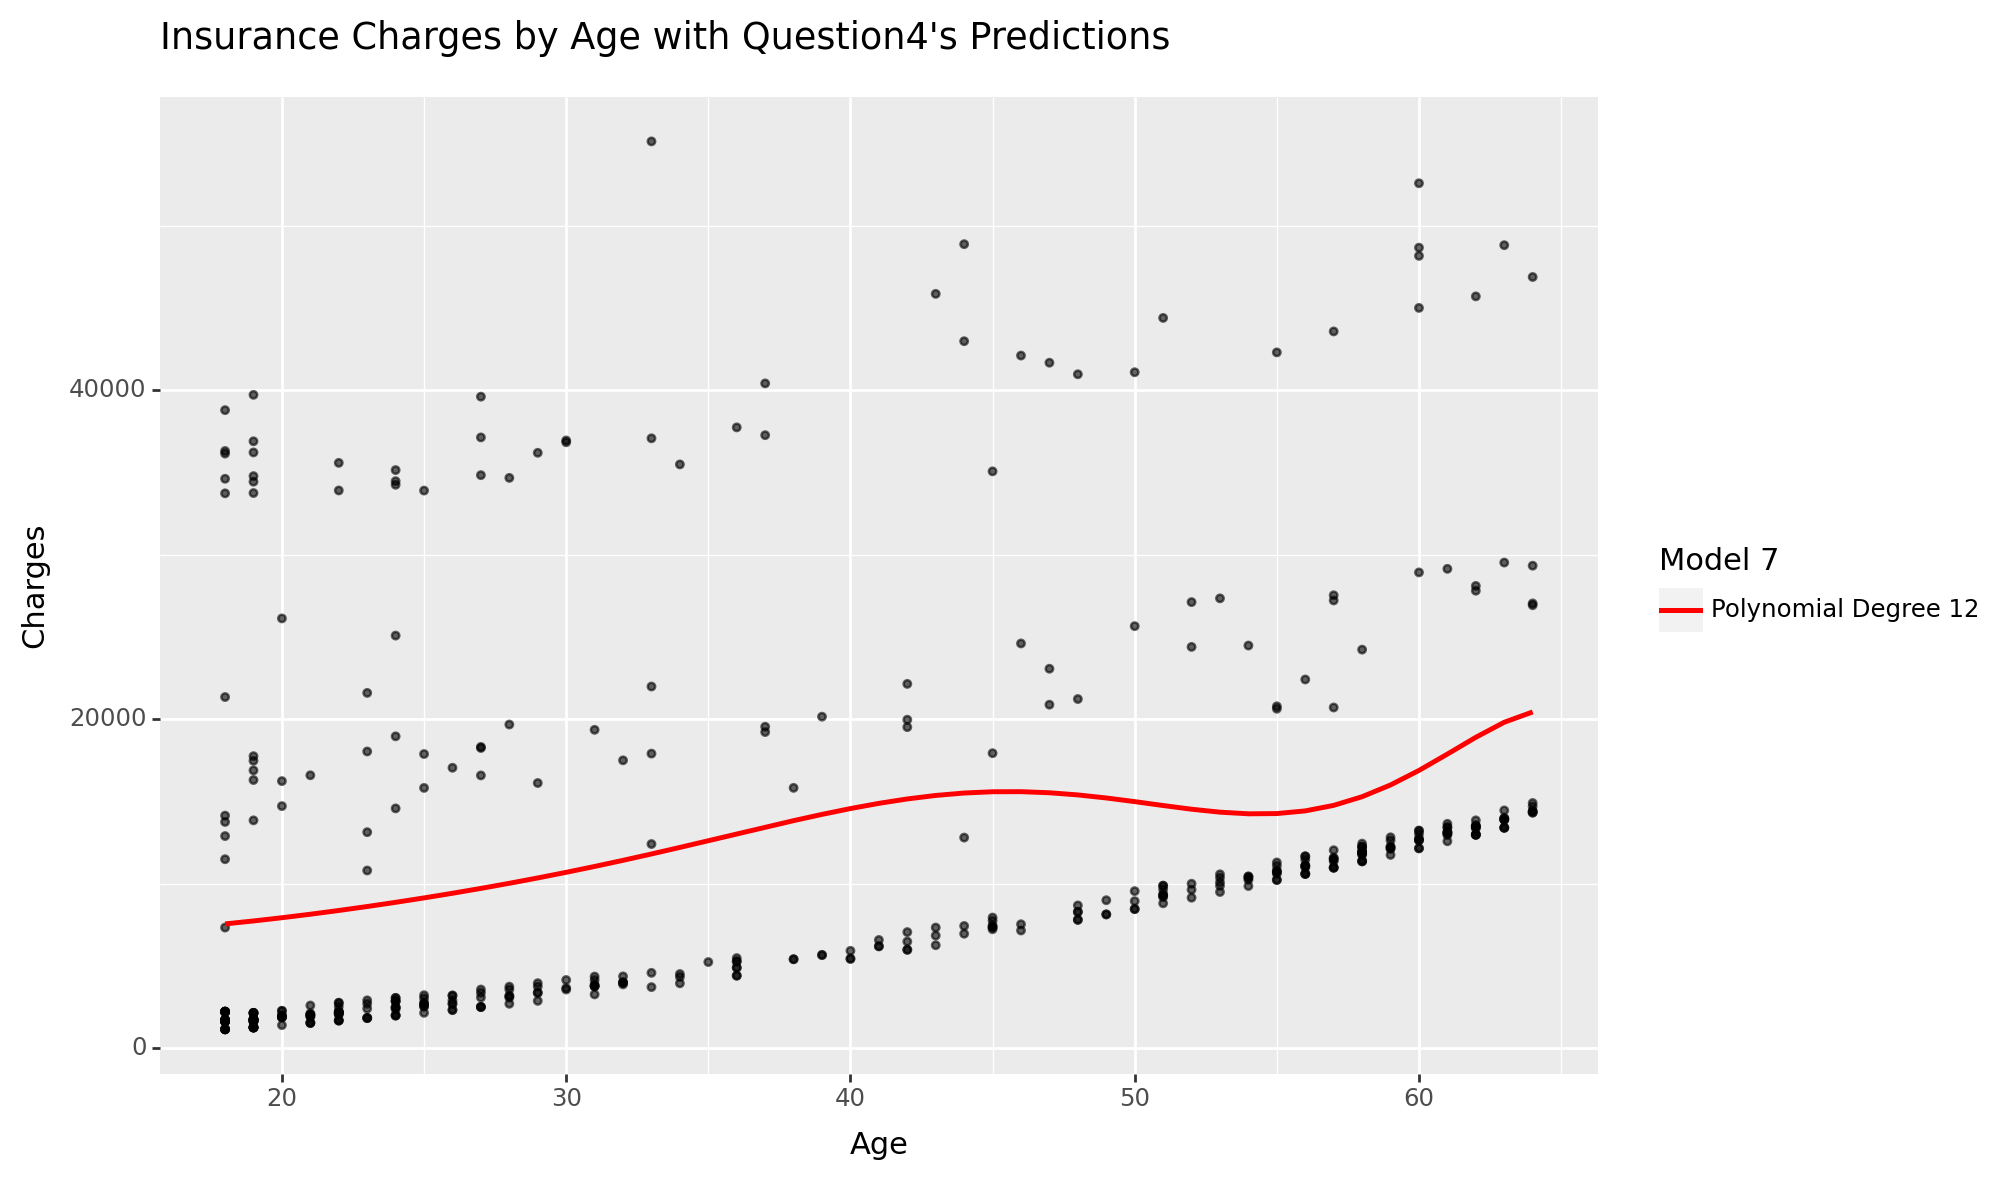

In [ ]:
from plotnine import ggplot, geom_point, geom_line, aes, theme, labs, scale_color_manual

# Creating a dataframe with predictions from Q4
pred7_df = ins_costs.assign(pred=y_pred7)

# Adding a column for the legend
pred7_df['Model 7'] = 'Polynomial Degree 12'

# Plotting
plot = (
    ggplot(data=pred7_df)
    + geom_point(aes(x='age', y='charges'), color='black', size=1, alpha=0.6)
    + geom_line(aes(x='age', y='pred', color='Model 7'), size=1)
    + labs(x='Age', y='Charges', title="Insurance Charges by Age with Question4's Predictions")
    + scale_color_manual(values=['red'])
    + theme(figure_size=(10, 6),
             legend_position='right')
)

print(plot)

# **Part Four: New data**

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

*   For each model, fit the model on the original data.

*   Then, use the fitted model to predict on the new data.

*   Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

*   Make a plot showing the residuals of your final chosen model.

In [ ]:
# Importing the new and original datasets
import pandas as pd

ins_costs_og = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
ins_costs_new = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

In [ ]:
# Model 1: only age as a predictor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# Setting the predictor and response variables
X_original_age = ins_costs_og[['age']]
y_original = ins_costs_og['charges']

# Fitting the model using only age as a predictor
lr = LinearRegression()
lr.fit(X_original_age, y_original)

# Predicting with the new data
X_new_age = ins_costs_new[['age']]
y_new = ins_costs_new['charges']
predictions_age = lr.predict(X_new_age)

# Calculating MSE for the predictions
mse_age = mean_squared_error(y_new, predictions_age)
print(f'MSE for model with only age as a predictor: {mse_age:.2f}')

MSE for model with only age as a predictor: 136077136.50


In [ ]:
# Model 2: age and bmi as a predictor
# Setting the predictor and response variables
X_original_age_bmi = ins_costs_og[['age', 'bmi']]
y_original = ins_costs_og['charges']

# Fitting the model using age and bmi as predictors
lr.fit(X_original_age_bmi, y_original)

# Predicting with the new data
X_new_age_bmi = ins_costs_new[['age', 'bmi']]
y_new = ins_costs_new['charges']
predictions_age_bmi = lr.predict(X_new_age_bmi)

# Calculating MSE for the predictions
mse_age_bmi = mean_squared_error(y_new, predictions_age_bmi)
print(f'MSE for model with age and bmi as predictors: {mse_age_bmi:.2f}')

MSE for model with age and bmi as predictors: 132636406.11


In [ ]:
# Model 3: age, bmi, and smoker as predictors (no interaction terms)
# Create dummy variables for 'smoker'
ins_costs_og_dummies = pd.get_dummies(ins_costs_og, columns=['smoker'], drop_first=True)
ins_costs_new_dummies = pd.get_dummies(ins_costs_new, columns=['smoker'], drop_first=True)

# Setting the predictor and response variables
X_original_age_bmi_smoker = ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']]
y_original = ins_costs_og_dummies['charges']

# Fitting the model using age, bmi, and smoker as predictors
lr.fit(X_original_age_bmi_smoker, y_original)

# Predicting with the new data
X_new_age_bmi_smoker = ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']]
y_new = ins_costs_new_dummies['charges']
predictions_age_bmi_smoker = lr.predict(X_new_age_bmi_smoker)

# Calculating MSE for the predictions
mse_age_bmi_smoker = mean_squared_error(y_new, predictions_age_bmi_smoker)
print(f'MSE for model with age, bmi, and smoker as predictors: {mse_age_bmi_smoker:.2f}')

MSE for model with age, bmi, and smoker as predictors: 35377541.24


In [ ]:
# Model 4: age, and bmi, with both quantitative variables having an interaction
# term with smoker (i.e. the formula ~ (age + bmi):smoker)
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_original_interact = interaction.fit_transform(ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']])
X_new_interact = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])

# Fitting the model using the interaction terms
lr.fit(X_original_interact, y_original)

# Predicting with the new data using the interaction terms
predictions_interact = lr.predict(X_new_interact)

# Calculating MSE for the predictions
mse_interact = mean_squared_error(y_new, predictions_interact)
print(f'MSE for model with interaction terms: {mse_interact:.2f}')

MSE for model with interaction terms: 21785261.85


In [ ]:
# Model 5: age, bmi, and smokeras predictors, with both quantitative variables
# having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms for age and bmi with smoker
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_original_interact_full = interaction.fit_transform(ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']])

# We need to avoid duplicating the main effects since they are already included in the interaction terms
# The interaction terms are in the last two columns of X_original_interact_full
X_original_full = np.hstack([ins_costs_og_dummies[['age', 'bmi']].values, X_original_interact_full[:, -2:]])

# Fitting the model using the interaction terms along with the main effects
lr.fit(X_original_full, y_original)

# Prepare the new data in the same way
X_new_interact_full = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])
X_new_full = np.hstack([ins_costs_new_dummies[['age', 'bmi']].values, X_new_interact_full[:, -2:]])

# Predicting with the new data using the interaction terms along with the main effects
predictions_full_interact = lr.predict(X_new_full)

# Calculating MSE for the predictions
mse_full_interact = mean_squared_error(y_new, predictions_full_interact)
print(f'MSE for model with full interaction terms: {mse_full_interact:.2f}')

MSE for model with full interaction terms: 24795908.41


In [ ]:
# Reporting the MSE for each model's new predictions
# Creating a dictionary with model names and their MSE values
mse_values = {
    'Model': ['Age', 'Age + BMI', 'Age + BMI + Smoker', 'Age + BMI + Interaction', 'Age + BMI + Smoker + Full Interaction'],
    'MSE': [mse_age, mse_age_bmi, mse_age_bmi_smoker, mse_interact, mse_full_interact]
}

# Creating a dataframe
mse_table = pd.DataFrame(mse_values)

# Displaying the table
print(mse_table)

                                   Model           MSE
0                                    Age  1.360771e+08
1                              Age + BMI  1.326364e+08
2                     Age + BMI + Smoker  3.537754e+07
3                Age + BMI + Interaction  2.178526e+07
4  Age + BMI + Smoker + Full Interaction  2.479591e+07


In [ ]:
# Finding the model with the lowest MSE
best_model = mse_table.loc[mse_table['MSE'].idxmin()]
print(f"Based on the MSE for each model's new prediction, the best model is {best_model['Model']} with an MSE of {best_model['MSE']:.2f}")

Based on the MSE for each model's new prediction, the best model is Age + BMI + Interaction with an MSE of 21785261.85


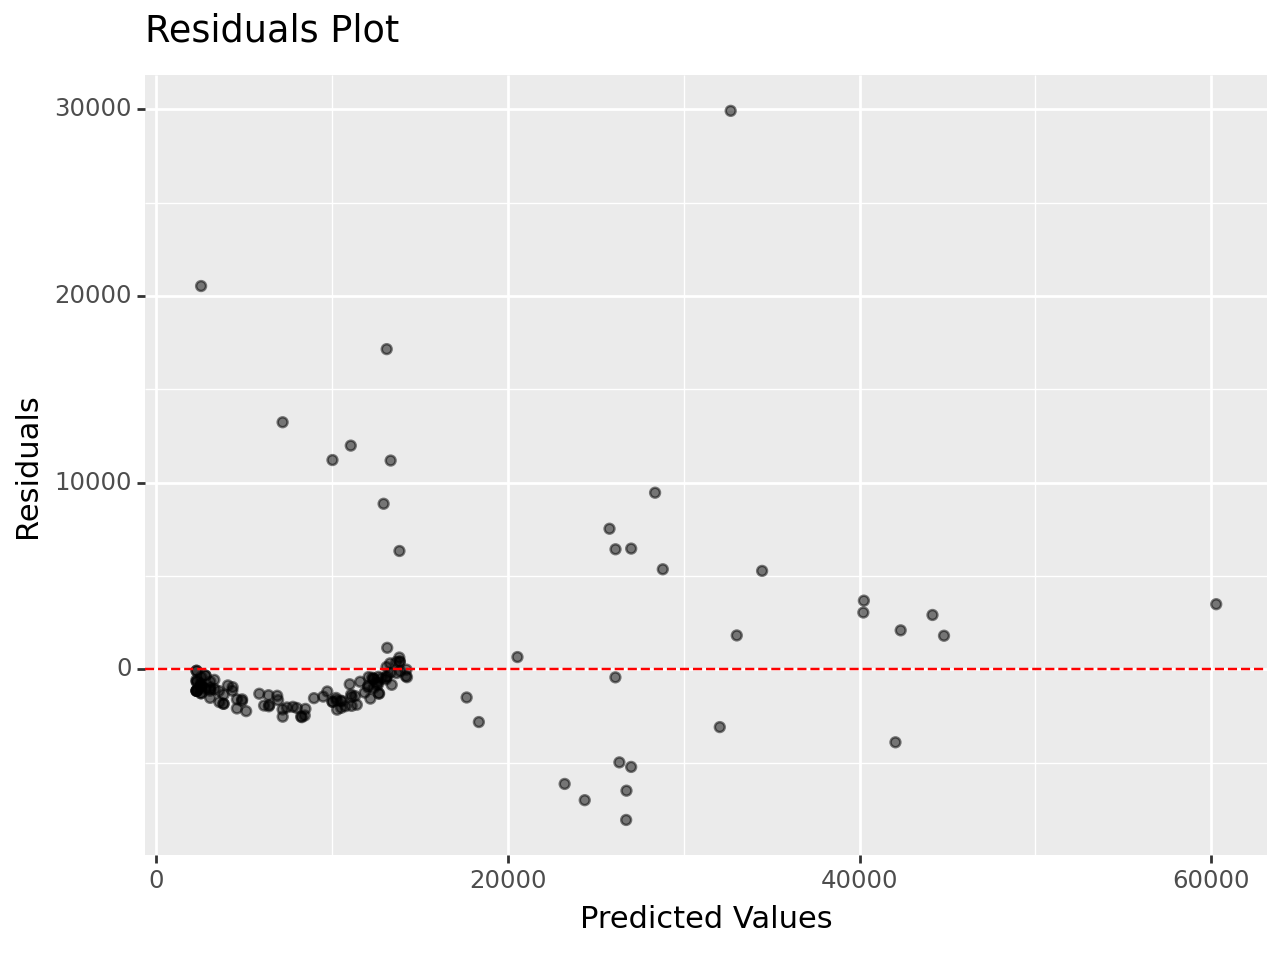

In [ ]:
# Plotting the residuals of the final chosen model, Model 4
from plotnine import ggplot, aes, geom_point, geom_hline, labs

# Defining the residuals by subtracting the predictions from Model 4 from the actual values
residuals = y_new - predictions_interact

# Creating a dataframe for the plot
plot_data = pd.DataFrame({
    'Predicted': predictions_interact,
    'Residuals': residuals
})

# Plotting the residuals from Model 4
residuals_plot = (
    ggplot(plot_data, aes(x='Predicted', y='Residuals')) +
    geom_point(alpha=0.5) +
    geom_hline(yintercept=0, color='red', linetype='dashed') +
    labs(x='Predicted Values', y='Residuals', title='Residuals Plot')
)

print(residuals_plot)

Overall, the spread of values is random, with no patterns or funneling. There is a small clump near the lower end of predicted values, from where we can infer that the model doesn't fit as well for lower insurance charges.

# **Part Five: Full Exploration**

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

Best polynomial degree: 2
MSE on new data: 25286749.376741596


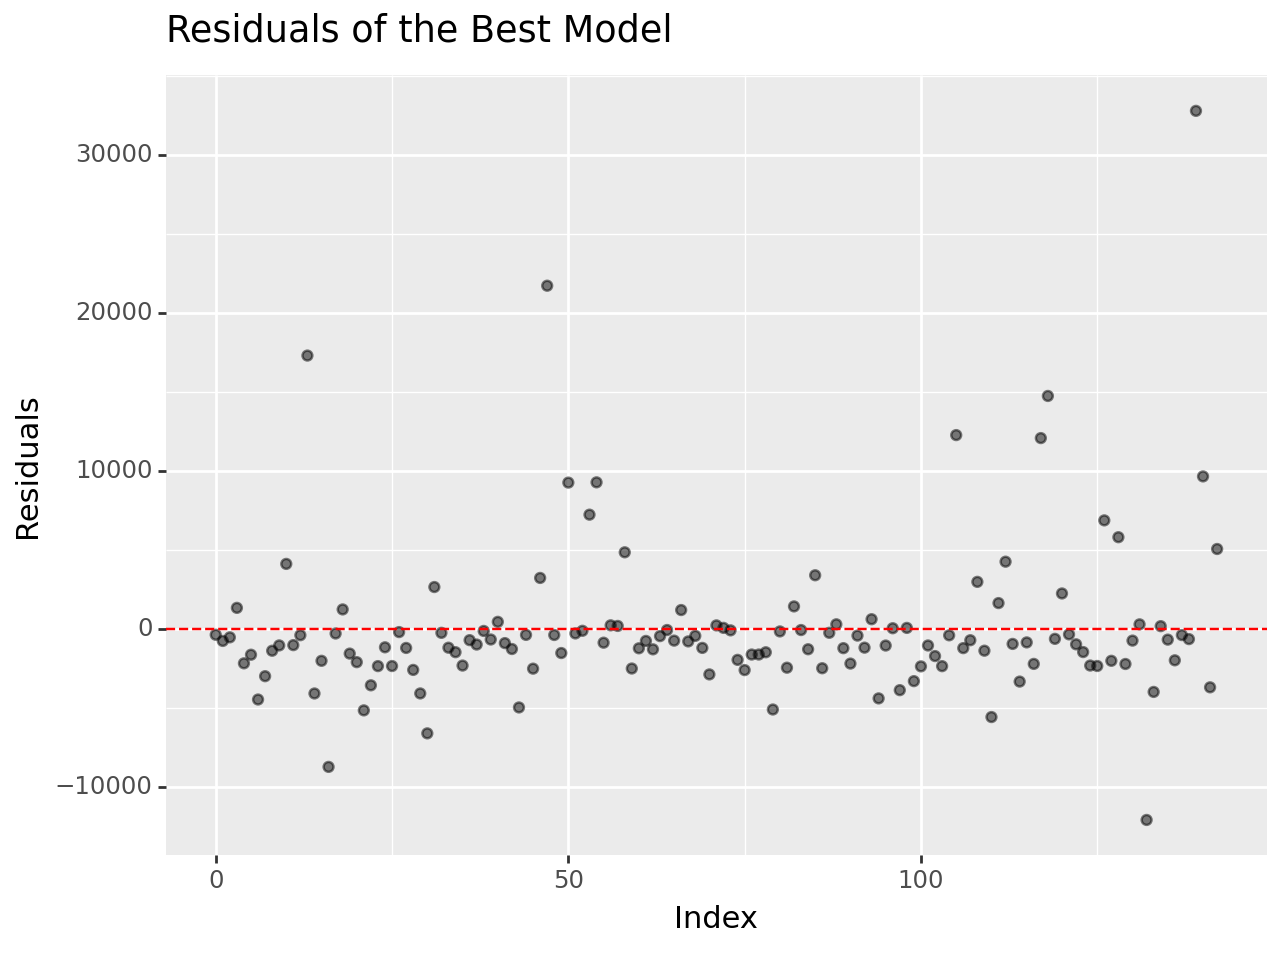

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_point, geom_line, geom_hline, labs

# Load the datasets
original_data = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
new_data = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

# Preprocess the data: Encode categorical variables
original_data_encoded = pd.get_dummies(original_data, drop_first=True)
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Ensure the same columns in both datasets after encoding (important for consistent model predictions)
new_data_encoded = new_data_encoded.reindex(columns=original_data_encoded.columns, fill_value=0)

# Separate predictors and response
X_original = original_data_encoded.drop('charges', axis=1)
y_original = original_data_encoded['charges']
X_new = new_data_encoded.drop('charges', axis=1)
y_new = new_data_encoded['charges']

# Initialize variables to track the best model
best_degree = 0
lowest_mse = float('inf')
best_model = None

# Try different polynomial degrees
for degree in range(1, 5):  # Example: trying degrees 1 through 4
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_original)

    # Split the original data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y_original, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate MSE on the validation set
    mse = mean_squared_error(y_val, y_val_pred)

    # If this model is better, update the best model information
    if mse < lowest_mse:
        lowest_mse = mse
        best_degree = degree
        best_model = model

# Use the best model to predict on the new data
X_new_poly = PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X_new)
y_new_pred = best_model.predict(X_new_poly)

# Calculate MSE on the new data
mse_new_data = mean_squared_error(y_new, y_new_pred)
print(f'Best polynomial degree: {best_degree}')
print(f'MSE on new data: {mse_new_data}')

# Calculate residuals on the new data
residuals = y_new - y_new_pred

# Plot the residuals
residual_plot = (ggplot(pd.DataFrame({'Residuals': residuals, 'Index': range(len(residuals))}), aes(x='Index', y='Residuals'))
                 + geom_point(alpha=0.5)
                 + geom_hline(yintercept=0, color='red', linetype='dashed')
                 + labs(title='Residuals of the Best Model', x='Index', y='Residuals'))

# Display the plot
residual_plot.draw()